# 一般化線形モデル

## 個体ごとに平均種子数が異なる場合
架空植物100個体を調査して得られた，個体ごとの種子数のデータ
- 体サイズ(body size)：$x_i$
- 処理のデータ
    - 50個体は何も処理をしていない（処理C)
    - 50個体は肥料を加える処理（処理T)

In [1]:
import pandas as pd
d = pd.read_csv('data3a.csv')
#data = df.iloc[:, 0].values
#data

## 観測されたデータの概要を調べる

In [4]:
d['x'].values

array([  8.31,   9.44,   9.5 ,   9.07,  10.16,   8.32,  10.61,  10.06,
         9.93,  10.43,  10.36,  10.15,  10.92,   8.85,   9.42,  11.11,
         8.02,  11.93,   8.55,   7.19,   9.83,  10.79,   8.89,  10.09,
        11.63,  10.21,   9.45,  10.44,   9.44,  10.48,   9.43,  10.32,
        10.33,   8.5 ,   9.41,   8.96,   9.67,  10.26,  10.36,  11.8 ,
        10.94,  10.25,   8.74,  10.46,   9.37,   9.74,   8.95,   8.74,
        11.32,   9.25,  10.14,   9.05,   9.89,   8.76,  12.04,   9.91,
         9.84,  11.87,  10.16,   9.34,  10.17,  10.99,   9.19,  10.67,
        10.96,  10.55,   9.69,  10.91,   9.6 ,  12.37,  10.54,  11.3 ,
        12.4 ,  10.18,   9.53,  10.24,  11.76,   9.52,  10.4 ,   9.96,
        10.3 ,  11.54,   9.42,  11.28,   9.73,  10.78,  10.21,  10.51,
        10.73,   8.85,  11.2 ,   9.86,  11.54,  10.03,  11.88,   9.15,
         8.52,  10.24,  10.86,   9.97])

In [5]:
d['y'].values

array([ 6,  6,  6, 12, 10,  4,  9,  9,  9, 11,  6, 10,  6, 10, 11,  8,  3,
        8,  5,  5,  4, 11,  5, 10,  6,  6,  7,  9,  3, 10,  2,  9, 10,  5,
       11, 10,  4,  8,  9, 12,  8,  9,  8,  6,  6, 10, 10,  9, 12,  6, 14,
        6,  7,  9,  6,  7,  9, 13,  9, 13,  7,  8, 10,  7, 12,  6, 15,  3,
        4,  6, 10,  8,  8,  7,  5,  6,  8,  9,  9,  6,  7, 10,  6, 11, 11,
       11,  5,  6,  4,  5,  6,  5,  8,  5,  9,  8,  6,  8,  7,  9])

In [6]:
d['f'].values

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], dtype=object)

In [8]:
d.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


## データの図示

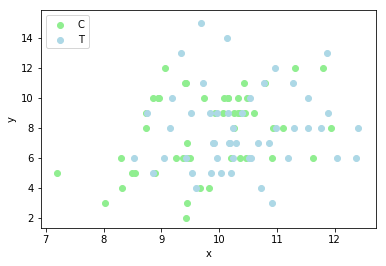

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(d.iloc[d['f'].values == 'C', 1].values, 
            d.iloc[d['f'].values == 'C', 0].values,
            color = 'lightgreen',
            label = 'C')
plt.scatter(d.iloc[d['f'].values == 'T', 1].values, 
            d.iloc[d['f'].values == 'T', 0].values,
            color = 'lightblue',
            label = 'T')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper left')
plt.show()

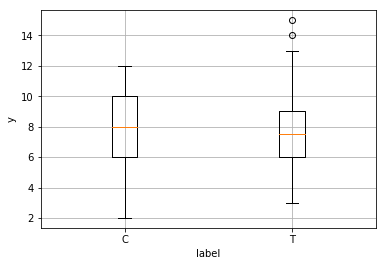

In [22]:
points = (d.iloc[d['f'].values == 'C', 0].values, 
          d.iloc[d['f'].values == 'T', 0].values)

fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels(['C', 'T'])
plt.xlabel('label')
plt.ylabel('y')
plt.grid()

plt.show()

### 線形予測子と対数リンク関数
ある個体$i$に置いて種子数が$y_i$である確率$p(y_i | \lambda_i)$はポアソン分布に従う．
<div style="text-align: center;">
$p(y_i | \lambda_i) = \frac{\lambda_i^{y_i} \exp(-\lambda)}{y_i !}$
</div>
この個体ごとに異なる平均$\lambda_i$を説明変数$x_i$の関数として定義．  
ある個体$i$の平均種子数$\lambda_i$が
### $\lambda_i = \exp(\beta_1 + \beta_2 x_i)$
であるとする．（$\beta_1$や$\beta_2$をパラメータと呼ぶ）

In [3]:
import numpy as np
def average_of_seeds(beta1, beta2, body_size):
    return np.exp(beta1 + beta2 * body_size)

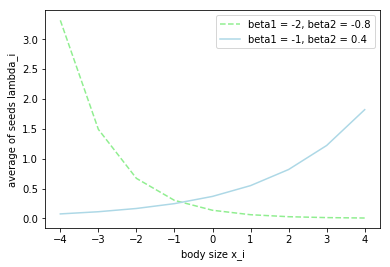

In [31]:
lambda1 = []
lambda2 = []
x = np.arange(-4, 5)
for i in x:
    lambda1.append(average_of_seeds(-2, -0.8, i))
    lambda2.append(average_of_seeds(-1, 0.4, i))

plt.plot(x, lambda1, linestyle = '--', color = 'lightgreen', label = 'beta1 = -2, beta2 = -0.8')
plt.plot(x, lambda2, color = 'lightblue', label = 'beta1 = -1, beta2 = 0.4')
plt.xlabel('body size x_i')
plt.ylabel('average of seeds lambda_i')
plt.legend(loc = 'upper right')
plt.show()

$\lambda_i = \exp(\beta_1 + \beta_2 x_i)$
は
$\log \lambda_i = \beta_1 + \beta_2 x_i$
と変形できる．  
$\beta_1 + \beta_2 x_i$は線形予測子と呼ばれる．  
（$\lambda_i$の関数）＝（線形予測子）となっている場合，左辺の「関数」はリンク関数と呼ばれる．

### あてはめとあてはまりの良さ
対数尤度$\log L$が最大になるパラメータ$\hat{\beta_1}$と$\hat{\beta_2}$を決める．  
データ$\bf Y$の元でのこのモデルの対数尤度は  
### $\log L (\beta_1, \beta_2) = \sum_{i} \log \frac{\lambda_i^{y_i} \exp(-\lambda)}{y_i !}$  
となる．線形予測子は$\log \lambda_i = \beta_1 + \beta_2 x_i$なので$\lambda_i$は$\beta_1$と $\beta_2$の関数である．

In [4]:
import statsmodels.api as sm

d.x_c = sm.add_constant(d.x)
model = sm.GLM(d.y, d.x_c, family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Fri, 14 Sep 2018   Deviance:                       84.993
Time:                        16:48:43   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000         0.579     2.005
x              0.0757      0.036      2.125      0.034         0.006     0.145
==============================================================================
"""

### ポアソン回帰モデルによる予測
ポアソン回帰の推定結果を使って，様々な体サイズ$x$に置ける平均種子数$\lambda$の予測を行う．

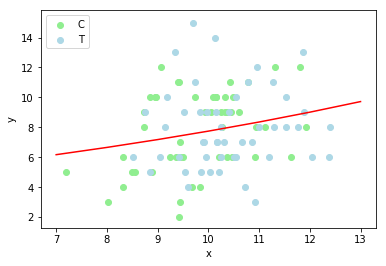

In [42]:
lamb = []
x = np.arange(7, 14)
for i in x:
    lamb.append(average_of_seeds(1.29, 0.0757, i))
plt.plot(x, lamb, color = 'red')
plt.scatter(d.iloc[d['f'].values == 'C', 1].values, 
            d.iloc[d['f'].values == 'C', 0].values,
            color = 'lightgreen',
            label = 'C')
plt.scatter(d.iloc[d['f'].values == 'T', 1].values, 
            d.iloc[d['f'].values == 'T', 0].values,
            color = 'lightblue',
            label = 'T')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper left')
plt.show()

## 説明変数が因子型の統計モデル
施肥効果$f_i$だけが影響するモデルの平均値を
### $\lambda_i = \exp(\beta_1 + \beta_2 d_i)$  
と書く．  
ダミー変数$d_i$について
- $d_i = 0$ $(f_i = C)$
- $d_i = 1$ $(f_i = T)$

In [5]:
dummy = []
for i in range(len(d)):
    if d.iloc[i, 2] == 'C':
        dummy.append(0)
    else:
        dummy.append(1)
d.f_c = sm.add_constant(dummy)
model = sm.GLM(d.y, d.f_c, family = sm.families.Poisson())
result = model.fit()

In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Tue, 11 Sep 2018   Deviance:                       89.475
Time:                        21:08:34   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000         1.952     2.151
x1             0.0128      0.071      0.179      0.858        -0.127     0.153
==============================================================================
"""

個体$i$の$f_i$がCの場合
- $\lambda_i = \exp(2.05 + 0) = 7.77$

個体$i$の$f_i$がTの場合
- $\lambda_i = \exp(2.05 + 0.0128) = 7.87$

「肥料をやると平均種子数がほんの少しだけ増える」

## 説明変数が数量型＋因子型の統計モデル
個体の体サイズ$x_i$と施肥効果$f_i$の説明変数を同時に組み込んだ統計モデル
### $\log \lambda_i = \beta_1 + \beta_2 x_i + \beta_3 d_i$


In [26]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
xf = np.c_[np.ones(len(d)), 
           d['x'].values, 
           np.array(class_le.fit_transform(d['f'].values))]
model = sm.GLM(d.y, d.f_c, family = sm.families.Poisson())
result = model.fit()

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Fri, 14 Sep 2018   Deviance:                       84.808
Time:                        17:12:30   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001         0.539     1.988
x1             0.0801      0.037      2.162      0.031         0.007     0.153
x2            -0.0320      0.074     -0.430      0.667        -0.178     0.114
==============================================================================
"""

x1：x  
x2：fT

このモデルの推定結果を予測としてまとめると，体サイズ$x_i$の個体$i$の施肥処理$f_i$がCならば平均種子数は
### $\lambda_i = \exp(1.26 + 0.08x_i)$
$f_i$がTならば，
### $\lambda_i = \exp(1.26 + 0.08x_i - 0.032)$
となる．

## 対数リンク関数を使用した場合と恒等関数を利用した場合の種子数

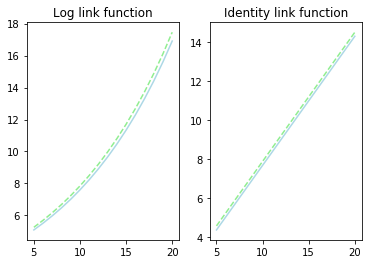

In [47]:
log_lambda1 = []
log_lambda2 = []
lambda1 = []
lambda2 = []
x = np.arange(5, 21)

for i in x:
    log_lambda1.append(np.exp(1.26 + 0.08 * i))
    log_lambda2.append(np.exp(1.26 + 0.08 * i - 0.032))

for i in x:
    lambda1.append(1.27 + 0.661 * i)
    lambda2.append(1.27 + 0.661 * i - 0.205)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, log_lambda1, linestyle = '--', color = 'lightgreen', label = 'C')
ax[0].plot(x, log_lambda2, color = 'lightblue', label = 'T')
ax[0].set_title('Log link function')

ax[1].plot(x, lambda1, linestyle = '--', color = 'lightgreen', label = 'C')
ax[1].plot(x, lambda2, color = 'lightblue', label = 'T')
ax[1].set_title('Identity link function')
plt.show()

## ポアソン分布利用の妥当性
このデータをポアソン分布を使ったGLMで説明しようとするのは比較的妥当
- ポアソン分布を使っているのでカウントデータに正しく対応
- 対数リンク関数を使えば平均値は常に非負
- $y$のばらつきは平均とともに増大する

## 「なんでも正規分布」，「なんでも直線」から脱却
GLMの特徴はデータに合わせて確率分布とリンク関数を選べる点  
適切なものを選びましょう